In [ ]:
import os
import re
import math
import numpy as np
import numpy.ma as ma
import pandas as pd
import random 
import seaborn as sns
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
mydata = pd.read_csv('drive/My Drive/DM/HR_comma_sep.csv', header=None,  
                         names = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                                  'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department','salary',
                                  'left'], sep = ',')

In [ ]:
import pandas as pd

#thetas = np.loadtxt('thetas_batch.out',  delimiter=',')   # load array
my_Y = finalpredict(X_test,thetas_batch) #predict test data on base of thetas value provided

confusionMatrix(my_Y,Y_test)

In [ ]:
# Implement your own PCA. You are only allowed to use numpy.
# Look at mean, cov, eig methods of the numpy for help.

def pca(X):
    '''
    # PCA step by step
    #   1. normalize matrix X
    #   2. compute the covariance matrix of the normalized matrix X
    #   3. do the eigenvalue decomposition on the covariance matrix
    '''

    ####################################################################
    # here V is the matrix containing all the eigenvectors, D is the
    # column vector containing all the corresponding eigenvalues.
    
    #YOUR CODE HERE!
    
    for x in range(X.shape[1]):
    
        minn = min(X[:,x])
        maxx = max(X[:,x])
        X[:,x] = X[:,x] - minn
        diff = maxx - minn
        X[:,x] = X[:,x] / diff
    

    covar = np.cov(np.transpose(X))
    corr = np.corrcoef(np.transpose(X))

    #fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
    #sns.heatmap(covar, annot=True, cmap="YlGnBu",ax=ax1)
    #sns.heatmap(corr, annot=True, cmap="YlGnBu",ax=ax2)

    D, V = np.linalg.eig(covar) 

    print(V[1,:])
    print(D)
    #sorting V wrt D
    sortedD = np.sort(D)
    print(sortedD)
    sortedD = sortedD[::-1] 
    print(sortedD)   
    A = np.argsort(D)
    print(A)
    A = A[::-1]
    print(A)
    sortedV = np.empty(V.shape)
    for x in range(A.size):
        
        sortedV[:,x] = V[:,A[x]]
    
    W = np.delete(sortedV, A.size-2,1)
    print(W.shape)  
    print(sortedV[1,:])
  
    newX = X.dot(W)

    
    ''''
    V = np.square(V)
    V = np.sum(V,axis =0)
    #print("Eigon vector",V[:,0:3])
    V = np.argsort(V)
    print(V)
    #print("Eigon vector",V[:,0:3])
    V = V[::-1]
    print(V)
    #print("Eigon vector",V)
    '''
    return D , V 


[ 0.00944878  0.03218498 -0.62988589 -0.13796263 -0.04387379 -0.3130046
 -0.68353592 -0.12444645  0.01642126 -0.01449867]
[0.21095916 0.11818752 0.10994599 0.09957587 0.09542481 0.06331567
 0.04058697 0.03293351 0.02930829 0.02016267]
[0.02016267 0.02930829 0.03293351 0.04058697 0.06331567 0.09542481
 0.09957587 0.10994599 0.11818752 0.21095916]
[0.21095916 0.11818752 0.10994599 0.09957587 0.09542481 0.06331567
 0.04058697 0.03293351 0.02930829 0.02016267]
[9 8 7 6 5 4 3 2 1 0]
[0 1 2 3 4 5 6 7 8 9]
(10, 9)
[ 0.00944878  0.03218498 -0.62988589 -0.13796263 -0.04387379 -0.3130046
 -0.68353592 -0.12444645  0.01642126 -0.01449867]
EV (10,)
0.8204004639985699
POV [0.25714169 0.14406077 0.13401502 0.12137471 0.11631492 0.07717654
 0.04947214 0.04014321 0.03572438 0.02457663]


Text(0, 0.5, 'POV')

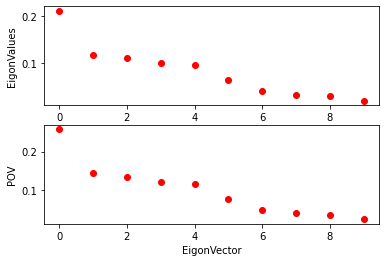

In [ ]:
 D , V = pca(Data.to_numpy())

print("EV",D.shape)
print(np.sum(D))
#proportion of variance
POV = D / np.sum(D)
print("POV",POV)

V = np.square(V)
V = np.sum(V,axis =0)
order = range(0,10)

#plt.plot(POV,V)

plt.subplot(2, 1, 1)
a = plt.plot(order,D, 'ro')
plt.xlabel('EigonVector')
plt.ylabel('EigonValues')


plt.subplot(2, 1, 2)
b = plt.plot(order,POV, 'ro')
plt.xlabel('EigonVector')
plt.ylabel('POV')


In [ ]:
def Zero_One_split (mydata):

    data = mydata.iloc[1:,:]
    data.head()
    print(data.department.unique())
    print(data.salary.unique())
    data.department =data.department.replace(to_replace ='sales',value= '0')
    data.department =data.department.replace(to_replace ='accounting',value= '1')
    data.department =data.department.replace(to_replace ='hr',value= '2')
    data.department =data.department.replace(to_replace ='technical',value= '3')
    data.department =data.department.replace(to_replace ='support',value= '4')
    data.department =data.department.replace(to_replace ='management',value= '5')
    data.department =data.department.replace(to_replace ='IT',value= '6')
    data.department =data.department.replace(to_replace ='product_mng',value= '7')
    data.department =data.department.replace(to_replace ='marketing',value= '8')
    data.department =data.department.replace(to_replace ='RandD',value= '9')

    data.salary =data.salary.replace(to_replace ='low',value= '0')
    data.salary =data.salary.replace(to_replace ='medium',value= '1')
    data.salary =data.salary.replace(to_replace ='high',value= '2')

    data = data.astype(float)
    print(data.shape)
    un_normalized_data = data.copy()

    
    for x in range(data.shape[1]):

        minn = min(data.iloc[:,x])
        maxx = max(data.iloc[:,x])
        data.iloc[:,x] = data.iloc[:,x] - minn
        diff = maxx - minn
        data.iloc[:,x] = data.iloc[:,x] / diff
    

    data = data.sort_values(by=['left'])

    #seperating all the classes from data
    zero=0
    one=0
    
    for i in range(data.shape[0]):

        if(data.iloc[i,9] == 0):
            zero+=1
            one+=1

        if(data.iloc[i,9] == 1):
            one+=1
            
    zerosData = data.iloc[0:zero,:]
    onesData = data.iloc[zero:one,:]
    print('zeros=',zero,'ones',one)

    return zerosData, onesData ,un_normalized_data

In [ ]:
#The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups.
#A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%.
#'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department','salary'

Datazeros, Dataones, un_normalized_data = Zero_One_split(mydata)

print('Retained')
print(stats.ttest_ind(Dataones.satisfaction_level, Datazeros.satisfaction_level))
print(stats.ttest_ind(Dataones.last_evaluation, Datazeros.last_evaluation))
print(stats.ttest_ind(Dataones.number_project, Datazeros.number_project))
print(stats.ttest_ind(Dataones.average_montly_hours, Datazeros.average_montly_hours))
print(stats.ttest_ind(Dataones.time_spend_company, Datazeros.time_spend_company))
print(stats.ttest_ind(Dataones.Work_accident, Datazeros.Work_accident))
print(stats.ttest_ind(Dataones.promotion_last_5years, Datazeros.promotion_last_5years))
print(stats.ttest_ind(Dataones.department, Datazeros.department))
print(stats.ttest_ind(Dataones.salary, Datazeros.salary))

print('Left')
print(stats.ttest_ind(Dataones.left, Dataones.satisfaction_level))
print(stats.ttest_ind(Dataones.left, Dataones.last_evaluation))
print(stats.ttest_ind(Dataones.left, Dataones.number_project))
print(stats.ttest_ind(Dataones.left, Dataones.average_montly_hours))
print(stats.ttest_ind(Dataones.left, Dataones.time_spend_company))
print(stats.ttest_ind(Dataones.left, Dataones.Work_accident))
print(stats.ttest_ind(Dataones.left, Dataones.promotion_last_5years))
print(stats.ttest_ind(Dataones.left, Dataones.department))
print(stats.ttest_ind(Dataones.left, Dataones.salary))


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
['0' '1' '2']
(14999, 10)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


zeros= 11428 ones 14999
Retained
Ttest_indResult(statistic=-51.61280155890103, pvalue=0.0)
Ttest_indResult(statistic=0.804241616779656, pvalue=0.4212701963734924)
Ttest_indResult(statistic=2.913856435845963, pvalue=0.003575213870941856)
Ttest_indResult(statistic=8.752254731850021, pvalue=2.3113035567537315e-18)
Ttest_indResult(statistic=17.924210234916128, pvalue=4.207680457693794e-71)
Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)
Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)
Ttest_indResult(statistic=-5.370709711356837, pvalue=7.959668924973188e-08)
Ttest_indResult(statistic=-19.58216626170969, pvalue=2.475238171818194e-84)
Left
Ttest_indResult(statistic=126.76884190424437, pvalue=0.0)
Ttest_indResult(statistic=85.21626449001387, pvalue=0.0)
Ttest_indResult(statistic=103.35054591240211, pvalue=0.0)
Ttest_indResult(statistic=100.15888737161215, pvalue=0.0)
Ttest_indResult(statistic=374.27394074954645, pvalue=0.0)
Ttest_indRes

In [ ]:
Datazeros, Dataones, un_normalized_data = Zero_One_split(mydata)


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
['0' '1' '2']
(14999, 10)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


zeros= 11428 ones 14999


In [ ]:
#verifying function by using pre-solved problem
t = [[0,1,2],[1,2,1]]
t = np.asarray(t)
table = pd.DataFrame(data=t,dtype=float, columns= ['FA','Bsc','MS'] )
print(table)
chi2, p, dof, exp = chi2_contingency(table)
print(exp)
print(p)
print(chi2)

    FA  Bsc   MS
0  0.0  1.0  2.0
1  1.0  2.0  1.0
[[0.42857143 1.28571429 1.28571429]
 [0.57142857 1.71428571 1.71428571]]
0.4594258240359268
1.5555555555555558


In [ ]:
#'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
# 'department','salary'
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square 
#value indicates that the hypothesis of independence is incorrect.

#H0: Salary of the employee does not affect the decision whether to leave or not
#H1: Salary of the employee affects the decision whether to leave or not

#chi sqaure test between salary and left
Data = un_normalized_data
print(Data.shape)
sal0yes = 0
sal0no = 0
sal1yes = 0
sal1no = 0
sal2yes = 0
sal2no = 0

for x in range(1,Data.shape[0]+1):

    if (Data.loc[x,'salary'] == 0 ):
        if(Data.loc[x,'left'] == 1 ):
            sal0yes +=1 

    if (Data.loc[x,'salary'] == 0 ):
        if(Data.loc[x,'left'] == 0 ):
            sal0no +=1

    if (Data.loc[x,'salary'] == 1 ):
        if(Data.loc[x,'left'] == 1 ):
            sal1yes +=1

    if (Data.loc[x,'salary'] == 1 ):
        if(Data.loc[x,'left'] == 0 ):
            sal1no +=1

    if (Data.loc[x,'salary'] == 2 ):
        if(Data.loc[x,'left'] == 1 ):
            sal2yes +=1

    if (Data.loc[x,'salary'] == 2 ):
        if(Data.loc[x,'left'] == 0 ):
            sal2no +=1


t = [[sal0yes,sal0no],[sal1yes,sal1no],[sal2yes,sal2no]]
t = np.asarray(t)
table = pd.DataFrame(data=t,dtype=float, columns= ['left','stayed'] )
print(table)
chi2, p, dof, exp = chi2_contingency(table)
print(exp)
print(p)
if(p>0.05):
  print('Salary doesnt affect the decision to leave the company')
if(p<0.05):
  print('Salary is associated with decision to leave the company')

(14999, 10)
     left  stayed
0  2172.0  5144.0
1  1317.0  5129.0
2    82.0  1155.0
[[1741.81185412 5574.18814588]
 [1534.68004534 4911.31995466]
 [ 294.50810054  942.49189946]]
1.652086749296005e-83
Salary is associated with decision to leave the company


In [ ]:
#'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
# 'department','salary'
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square 
#value indicates that the hypothesis of independence is incorrect.

#H0: Dept of the employee does not affect the decision whether to leave or not
#H1: Dept of the employee affects the decision whether to leave or not

#chi sqaure test between salary and left
Data = un_normalized_data
print(Data.shape)
yes0 = 0
no0 = 0
yes1 = 0
no1 = 0
yes2 = 0
no2 = 0
yes3 = 0
no3 = 0
yes4 = 0
no4 = 0
yes5 = 0
no5 = 0
yes6 = 0
no6 = 0
yes7 = 0
no7 = 0
yes8 = 0
no8 = 0
yes9 = 0
no9 = 0


for x in range(1,Data.shape[0]+1):


    if (Data.loc[x,'department'] == 0 ):
        if(Data.loc[x,'left'] == 1 ):
            yes0 +=1 

    if (Data.loc[x,'department'] == 0 ):
        if(Data.loc[x,'left'] == 0 ):
            no0 +=1

    if (Data.loc[x,'department'] == 1 ):
        if(Data.loc[x,'left'] == 1 ):
            yes1 +=1

    if (Data.loc[x,'department'] == 1 ):
        if(Data.loc[x,'left'] == 0 ):
            no1 +=1

    if (Data.loc[x,'department'] == 2 ):
        if(Data.loc[x,'left'] == 1 ):
            yes2 +=1

    if (Data.loc[x,'department'] == 2 ):
        if(Data.loc[x,'left'] == 0 ):
            no2 +=1

    if (Data.loc[x,'department'] == 3 ):
        if(Data.loc[x,'left'] == 0 ):
            no3 +=1

    if (Data.loc[x,'department'] == 3 ):
        if(Data.loc[x,'left'] == 1 ):
            yes3 +=1

    if (Data.loc[x,'department'] == 4 ):
        if(Data.loc[x,'left'] == 0 ):
            no4 +=1

    if (Data.loc[x,'department'] == 4 ):
        if(Data.loc[x,'left'] == 1 ):
            yes4 +=1

    if (Data.loc[x,'department'] == 5 ):
        if(Data.loc[x,'left'] == 0 ):
            no5 +=1

    if (Data.loc[x,'department'] == 5 ):
        if(Data.loc[x,'left'] == 1 ):
            yes5 +=1

    if (Data.loc[x,'department'] == 6 ):
        if(Data.loc[x,'left'] == 1 ):
            yes6 +=1

    if (Data.loc[x,'department'] == 6 ):
        if(Data.loc[x,'left'] == 0 ):
            no6 +=1

    if (Data.loc[x,'department'] == 7 ):
        if(Data.loc[x,'left'] == 1 ):
            yes7 +=1

    if (Data.loc[x,'department'] == 7 ):
        if(Data.loc[x,'left'] == 0 ):
            no7 +=1

    if (Data.loc[x,'department'] == 8 ):
        if(Data.loc[x,'left'] == 1 ):
            yes8 +=1

    if (Data.loc[x,'department'] == 8 ):
        if(Data.loc[x,'left'] == 0 ):
            no8 +=1

    if (Data.loc[x,'department'] == 9 ):
        if(Data.loc[x,'left'] == 1 ):
            yes9 +=1

    if (Data.loc[x,'department'] == 9 ):
        if(Data.loc[x,'left'] == 0 ):
            no9 +=1



t = [[yes0,no0],[yes1,no1],[yes2,no2],[yes3,no3],[yes4,no4],[yes5,no5],[yes6,no6],[yes7,no7],[yes8,no8],[yes9,no9]]
t = np.asarray(t)
table = pd.DataFrame(data=t,dtype=float, columns= ['left','stayed'] )
print(table)
chi2, p, dof, exp = chi2_contingency(table)
print(exp)
print(p)
if(p>0.05):
  print('Dept doesnt affect the decision to leave the company')
if(p<0.05):
  print('Dept is associated with decision to leave the company')

(14999, 10)
     left  stayed
0  1014.0  3126.0
1   204.0   563.0
2   215.0   524.0
3   697.0  2023.0
4   555.0  1674.0
5    91.0   539.0
6   273.0   954.0
7   198.0   704.0
8   203.0   655.0
9   121.0   666.0
[[ 985.66171078 3154.33828922]
 [ 182.60930729  584.39069271]
 [ 175.9429962   563.0570038 ]
 [ 647.58450563 2072.41549437]
 [ 530.68597907 1698.31402093]
 [ 149.99199947  480.00800053]
 [ 292.12727515  934.87272485]
 [ 214.75045003  687.24954997]
 [ 204.27481832  653.72518168]
 [ 187.37095806  599.62904194]]
7.042130463822518e-15
Dept is associated with decision to leave the company


In [ ]:
#'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
# 'department','salary'
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square 
#value indicates that the hypothesis of independence is incorrect.

#H0: Salary of the employee does not affect the decision whether to leave or not
#H1: Salary of the employee affects the decision whether to leave or not

#chi sqaure test between salary and left
Data = un_normalized_data
print(Data.shape)
yes0 = 0
no0 = 0
yes1 = 0
no1 = 0

for x in range(1,Data.shape[0]+1):

    if (Data.loc[x,'Work_accident'] == 0 ):
        if(Data.loc[x,'left'] == 1 ):
            yes0 +=1 

    if (Data.loc[x,'Work_accident'] == 0 ):
        if(Data.loc[x,'left'] == 0 ):
            no0 +=1

    if (Data.loc[x,'Work_accident'] == 1 ):
        if(Data.loc[x,'left'] == 1 ):
            yes1 +=1

    if (Data.loc[x,'Work_accident'] == 1 ):
        if(Data.loc[x,'left'] == 0 ):
            no1 +=1


t = [[yes0,no0],[yes1,no1]]
t = np.asarray(t)
table = pd.DataFrame(data=t,dtype=float, columns= ['left','stayed'] )
print(table)
chi2, p, dof, exp = chi2_contingency(table)
print(exp)
print(p)
if(p>0.05):
  print('Work accident doesnt affect the decision to leave the company')
if(p<0.05):
  print('Work accident is associated with decision to leave the company')

(14999, 10)
     left  stayed
0  3402.0  9428.0
1   169.0  2000.0
[[3054.59897326 9775.40102674]
 [ 516.40102674 1652.59897326]]
9.55823958002199e-80
Work accident is associated with decision to leave the company


In [ ]:
#'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
# 'department','salary'
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square 
#value indicates that the hypothesis of independence is incorrect.

#H0: Promotion of the employee does not affect the decision whether to leave or not
#H1: Promotion of the employee affects the decision whether to leave or not

#chi sqaure test between salary and left
Data = un_normalized_data
print(Data.shape)
yes0 = 0
no0 = 0
yes1 = 0
no1 = 0

for x in range(1,Data.shape[0]+1):

    if (Data.loc[x,'promotion_last_5years'] == 0 ):
        if(Data.loc[x,'left'] == 1 ):
            yes0 +=1 

    if (Data.loc[x,'promotion_last_5years'] == 0 ):
        if(Data.loc[x,'left'] == 0 ):
            no0 +=1

    if (Data.loc[x,'promotion_last_5years'] == 1 ):
        if(Data.loc[x,'left'] == 1 ):
            yes1 +=1

    if (Data.loc[x,'promotion_last_5years'] == 1 ):
        if(Data.loc[x,'left'] == 0 ):
            no1 +=1


t = [[yes0,no0],[yes1,no1]]
t = np.asarray(t)
table = pd.DataFrame(data=t,dtype=float, columns= ['left','stayed'] )
print(table)
chi2, p, dof, exp = chi2_contingency(table)
print(exp)
print(p)
if(p>0.05):
  print('Promotion doesnt affect the decision to leave the company')
if(p<0.05):
  print('Promotion is associated with decision to leave the company')

(14999, 10)
     left   stayed
0  3552.0  11128.0
1    19.0    300.0
[[ 3495.05167011 11184.94832989]
 [   75.94832989   243.05167011]]
6.34415545791872e-14
Promotion is associated with decision to leave the company


In [ ]:
#'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
# 'department','salary'
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square 
#value indicates that the hypothesis of independence is incorrect.

#H0: No of proj of the employee does not affect the decision whether to leave or not
#H1: No of proj of the employee affects the decision whether to leave or not

#chi sqaure test between salary and left
Data = un_normalized_data
print(Data.shape)
yes0 = 0
no0 = 0
yes1 = 0
no1 = 0
yes2 = 0
no2 = 0
yes3 = 0
no3 = 0
yes4 = 0
no4 = 0
yes5 = 0
no5 = 0
yes6 = 0
no6 = 0
yes7 = 0
no7 = 0


for x in range(1,Data.shape[0]+1):

    if (Data.loc[x,'number_project'] == 1 ):
        if(Data.loc[x,'left'] == 1 ):
            yes1 +=1

    if (Data.loc[x,'number_project'] == 1 ):
        if(Data.loc[x,'left'] == 0 ):
            no1 +=1

    if (Data.loc[x,'number_project'] == 2 ):
        if(Data.loc[x,'left'] == 1 ):
            yes2 +=1

    if (Data.loc[x,'number_project'] == 2 ):
        if(Data.loc[x,'left'] == 0 ):
            no2 +=1

    if (Data.loc[x,'number_project'] == 3 ):
        if(Data.loc[x,'left'] == 0 ):
            no3 +=1

    if (Data.loc[x,'number_project'] == 3 ):
        if(Data.loc[x,'left'] == 1 ):
            yes3 +=1

    if (Data.loc[x,'number_project'] == 4 ):
        if(Data.loc[x,'left'] == 0 ):
            no4 +=1

    if (Data.loc[x,'number_project'] == 4 ):
        if(Data.loc[x,'left'] == 1 ):
            yes4 +=1

    if (Data.loc[x,'number_project'] == 5 ):
        if(Data.loc[x,'left'] == 0 ):
            no5 +=1

    if (Data.loc[x,'number_project'] == 5 ):
        if(Data.loc[x,'left'] == 1 ):
            yes5 +=1

    if (Data.loc[x,'number_project'] == 6 ):
        if(Data.loc[x,'left'] == 1 ):
            yes6 +=1

    if (Data.loc[x,'number_project'] == 6 ):
        if(Data.loc[x,'left'] == 0 ):
            no6 +=1

    if (Data.loc[x,'number_project'] == 7 ):
        if(Data.loc[x,'left'] == 1 ):
            yes7 +=1

    if (Data.loc[x,'number_project'] == 7 ):
        if(Data.loc[x,'left'] == 0 ):
            no7 +=1


t = [[2,yes2,no2],[3,yes3,no3],[4,yes4,no4],[5,yes5,no5],[6,yes6,no6],[7,yes7,no7]]
t = np.asarray(t)
table = pd.DataFrame(data=t,dtype=float, columns= ['no of proj','left','stayed'] )
print(table)
#skipping no of proj column
chi2, p, dof, exp = chi2_contingency(table.iloc[:,1:])
print(p)
print(exp)
if(p>0.05):
  print('number of project doesnt affect the decision to leave the company')
if(p<0.05):
  print('number project is associated with decision to leave the company')

(14999, 10)
   no of proj    left  stayed
0         2.0  1567.0   821.0
1         3.0    72.0  3983.0
2         4.0   409.0  3956.0
3         5.0   612.0  2149.0
4         6.0   655.0   519.0
5         7.0   256.0     0.0
0.0
[[ 568.54110274 1819.45889726]
 [ 965.42469498 3089.57530502]
 [1039.23028202 3325.76971798]
 [ 657.34588973 2103.65411027]
 [ 279.50890059  894.49109941]
 [  60.94912994  195.05087006]]
number project is associated with decision to leave the company


In [ ]:
Datazeros, Dataones, un_normalized_data = Zero_One_split(mydata)

NameError: ignored

In [ ]:
#'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
# 'department','salary'
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square 
#value indicates that the hypothesis of independence is incorrect.

#H0: Time spent by the employee does not affect the decision whether to leave or not
#H1: Time spent by the employee affects the decision whether to leave or not

#chi sqaure test between salary and left
Data = un_normalized_data
print(Data.shape)
yes2 = 0
no2 = 0
yes3 = 0
no3 = 0
yes4 = 0
no4 = 0
yes5 = 0
no5 = 0
yes6 = 0
no6 = 0
yes7 = 0
no7 = 0
yes8 = 0
no8 = 0
yes9 = 0
no9 = 0
yes10 = 0
no10 = 0

for x in range(1,Data.shape[0]+1):

    if (Data.loc[x,'time_spend_company'] == 2 ):
        if(Data.loc[x,'left'] == 1 ):
            yes2 +=1

    if (Data.loc[x,'time_spend_company'] == 2 ):
        if(Data.loc[x,'left'] == 0 ):
            no2 +=1

    if (Data.loc[x,'time_spend_company'] == 3 ):
        if(Data.loc[x,'left'] == 0 ):
            no3 +=1

    if (Data.loc[x,'time_spend_company'] == 3 ):
        if(Data.loc[x,'left'] == 1 ):
            yes3 +=1

    if (Data.loc[x,'time_spend_company'] == 4 ):
        if(Data.loc[x,'left'] == 0 ):
            no4 +=1

    if (Data.loc[x,'time_spend_company'] == 4 ):
        if(Data.loc[x,'left'] == 1 ):
            yes4 +=1

    if (Data.loc[x,'time_spend_company'] == 5 ):
        if(Data.loc[x,'left'] == 0 ):
            no5 +=1

    if (Data.loc[x,'time_spend_company'] == 5 ):
        if(Data.loc[x,'left'] == 1 ):
            yes5 +=1

    if (Data.loc[x,'time_spend_company'] == 6 ):
        if(Data.loc[x,'left'] == 1 ):
            yes6 +=1

    if (Data.loc[x,'time_spend_company'] == 6 ):
        if(Data.loc[x,'left'] == 0 ):
            no6 +=1

    if (Data.loc[x,'time_spend_company'] == 7 ):
        if(Data.loc[x,'left'] == 1 ):
            yes7 +=1

    if (Data.loc[x,'time_spend_company'] == 7 ):
        if(Data.loc[x,'left'] == 0 ):
            no7 +=1

    if (Data.loc[x,'time_spend_company'] == 8 ):
        if(Data.loc[x,'left'] == 1 ):
            yes8 +=1

    if (Data.loc[x,'time_spend_company'] == 8 ):
        if(Data.loc[x,'left'] == 0 ):
            no8 +=1

    if (Data.loc[x,'time_spend_company'] == 9 ):
        if(Data.loc[x,'left'] == 1 ):
            yes9 +=1

    if (Data.loc[x,'time_spend_company'] == 9 ):
        if(Data.loc[x,'left'] == 0 ):
            no9 +=1

    if (Data.loc[x,'time_spend_company'] == 10 ):
        if(Data.loc[x,'left'] == 1 ):
            yes10 +=1

    if (Data.loc[x,'time_spend_company'] == 10 ):
        if(Data.loc[x,'left'] == 0 ):
            no10 +=1

t = [[2,yes2,no2],[3,yes3,no3],[4,yes4,no4],[5,yes5,no5],[6,yes6,no6],[7,yes7,no7],[8,yes8,no8],[9,yes10,no10]]
t = np.asarray(t)
table = pd.DataFrame(data=t,dtype=float, columns= ['years spent','left','stayed'] )
print(table)
chi2, p, dof, exp = chi2_contingency(table.iloc[:,1:])
print(exp)
print(p)
if(p>0.05):
  print('No of years spent in company doesnt affect the decision to leave the company')
if(p<0.05):
  print('No of years spent in company is associated with decision to leave the company')

(14999, 10)
   years spent    left  stayed
0          2.0    53.0  3191.0
1          3.0  1586.0  4857.0
2          4.0   890.0  1667.0
3          5.0   833.0   640.0
4          6.0   209.0   509.0
5          7.0     0.0   188.0
6          8.0     0.0   162.0
7          9.0     0.0   214.0
[[ 772.33975598 2471.66024402]
 [1533.96579772 4909.03420228]
 [ 608.7770518  1948.2229482 ]
 [ 350.69557971 1122.30442029]
 [ 170.94326288  547.05673712]
 [  44.7595173   143.2404827 ]
 [  38.56937129  123.43062871]
 [  50.94966331  163.05033669]]
0.0
No of years spent in company is associated with decision to leave the company


In [ ]:
#getting stat of employee who left after the promotion
Data = un_normalized_data
temp=0

for x in range(1,Data.shape[0]):

    if (Data.loc[x,'promotion_last_5years'] == 1 ):
        if(Data.loc[x,'left'] == 1 ):
            temp = temp + Data.loc[x,:]
  
            
print(temp/19)


satisfaction_level         0.460000
last_evaluation            0.588421
number_project             3.052632
average_montly_hours     177.736842
time_spend_company         3.263158
Work_accident              0.210526
promotion_last_5years      1.000000
department                 2.842105
salary                     0.263158
left                       1.000000
dtype: float64
